In [76]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score               

from warnings import filterwarnings
filterwarnings('ignore')


# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Prathima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Prathima\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [9]:
#Impoting Data Set
df = pd.read_csv(r"C:\Users\Prathima\Downloads\Life Expectancy Data_HV22.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
df.shape

(2938, 22)

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Data Pre-processing

In [13]:
#Changing the data types from object to int.
label_encoder = preprocessing.LabelEncoder()
df['Country']= label_encoder.fit_transform(df['Country']) 
df['Status']= label_encoder.fit_transform(df['Status'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
# df.drop(['infant deaths', 'Hepatitis B', 'under-five deaths ', ' thinness 5-9 years'], axis=1, inplace = True)

In [17]:
# df.columns

# Data Visualization

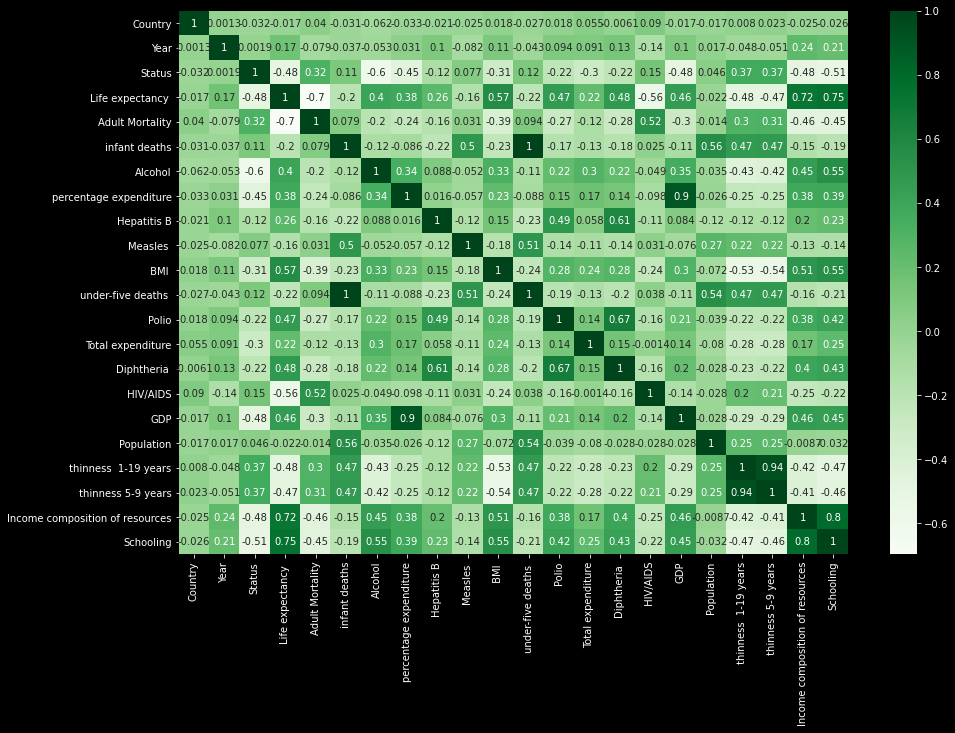

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [19]:
fig=px.histogram(df,x='Life expectancy ',template='plotly_dark')
fig.show()

<b> DEVELOPED COUNTRIES HAS MAXIMUM LIFE EXPENTANCY

In [20]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [21]:
px.scatter(df,x='Life expectancy ',y='percentage expenditure',color='Country',size='Year',template='plotly_dark',title='<b> Life Expectancy Versus Percentage expenditure')

#### DECREASE IN INFANT DEATHS INCREASES LIFE EXPECTANCY

In [22]:
px.scatter(df.sort_values(by='Year'),y='infant deaths',x='Life expectancy ',template='plotly_dark',size='Year',color='Country',opacity=0.6,title='<b>Life Expectancy Versus Infant Deaths of Countries in every Year')

## Imputation

The MeanMedianImputer() replaces missing data with the mean or median of the variable. It works only with numerical variables. A list of variables to impute can be indicated, or the imputer will automatically select all numerical variables in the train set. For more details, check the API Reference below.

### Mean

In [23]:
df_mean = df.fillna(df.mean())

In [24]:
df_mean.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Median

In [25]:
df_median = df.fillna(df.median())

In [26]:
df_median.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### bfill <br>
bfill() is used to backward fill the missing values in the dataset. It will backward fill the NaN values that are present in the pandas dataframe.

In [27]:
df_bfill = df.fillna(method='bfill')

In [28]:
df_bfill.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [29]:
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [30]:
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [31]:
df_bfill.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Feature Engineering

In [33]:
# VIF dataframe


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_bfill.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_bfill.values, i)
                          for i in range(len(df_bfill.columns))]
  
print(vif_data)

                            feature         VIF
0                           Country    4.060996
1                              Year  274.214996
2                            Status   11.178818
3                  Life expectancy   286.553999
4                   Adult Mortality    5.827545
5                     infant deaths  198.598709
6                           Alcohol    4.276734
7            percentage expenditure    5.182492
8                       Hepatitis B   15.728344
9                          Measles     1.449260
10                             BMI     8.085556
11               under-five deaths   198.435201
12                            Polio   26.752090
13                Total expenditure    7.904329
14                      Diphtheria    28.614533
15                         HIV/AIDS    1.966321
16                              GDP    6.136259
17                       Population    1.547735
18             thinness  1-19 years   19.341071
19               thinness 5-9 years   19

<AxesSubplot:>

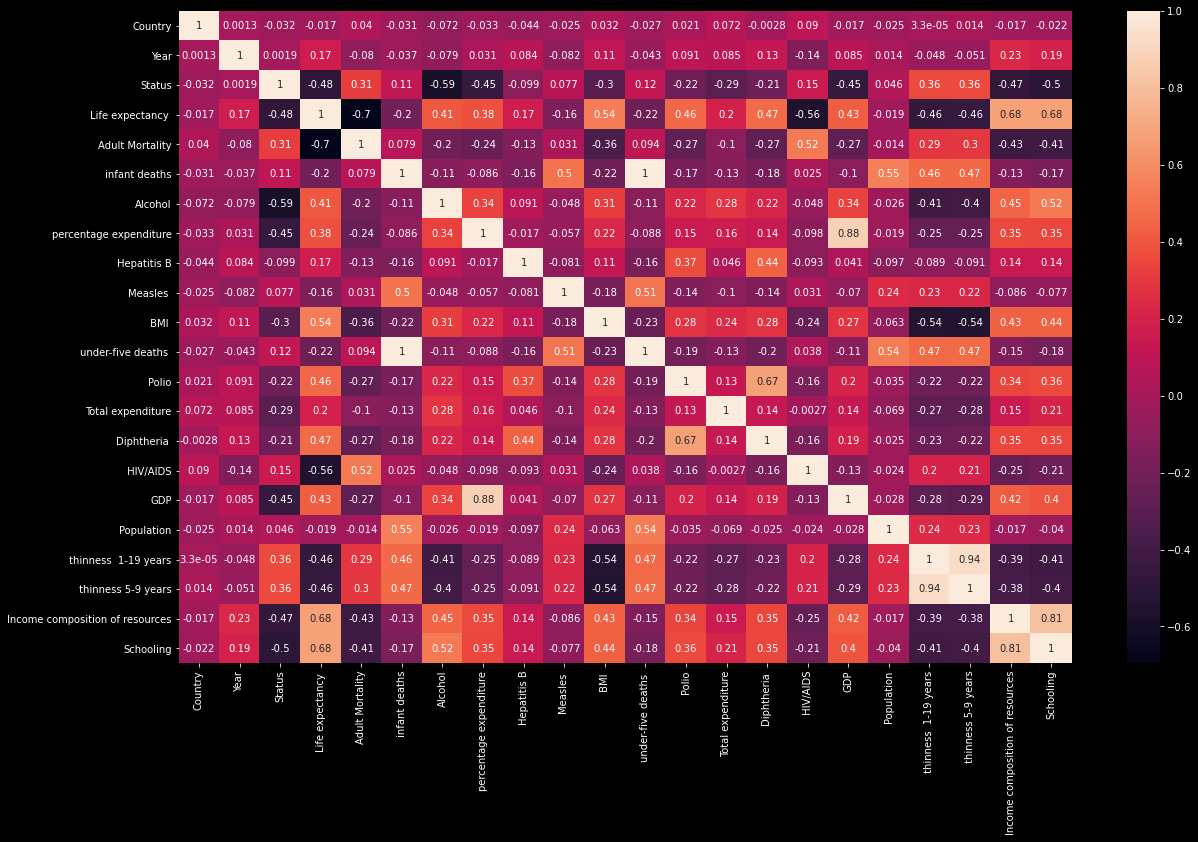

In [35]:
plt.figure(figsize=(20,12))
sns.heatmap(df_bfill.corr(),annot=True)

#### Drop columns

In [36]:
df.drop(['infant deaths', 'Hepatitis B', 'under-five deaths ', ' thinness 5-9 years'], axis=1, inplace = True)

In [38]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [39]:
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [40]:
df_bfill.corr()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.017119,0.039785,-0.030528,-0.071810,-0.032983,-0.044336,-0.024593,0.032256,-0.026509,0.021005,0.072239,-0.002820,0.090206,-0.016683,-0.025234,0.000033,0.014435,-0.016517,-0.022456
Year,0.001342,1.000000,0.001864,0.170613,-0.079977,-0.037415,-0.079279,0.031400,0.084023,-0.082493,0.106936,-0.042937,0.090635,0.084587,0.130606,-0.139741,0.085218,0.014104,-0.047612,-0.050646,0.230614,0.194610
Status,-0.031635,0.001864,1.000000,-0.481080,0.314437,0.112252,-0.589490,-0.454261,-0.098508,0.076955,-0.302340,0.115195,-0.218031,-0.293266,-0.214692,0.148590,-0.451567,0.046144,0.363659,0.361979,-0.467494,-0.497417
Life expectancy,-0.017119,0.170613,-0.481080,1.000000,-0.695826,-0.196603,0.406810,0.381033,0.169017,-0.157633,0.538652,-0.222553,0.458867,0.196209,0.472648,-0.556261,0.425431,-0.018604,-0.461506,-0.455871,0.677659,0.677557
Adult Mortality,0.039785,-0.079977,0.314437,-0.695826,1.000000,0.078935,-0.203059,-0.242408,-0.126931,0.031357,-0.363831,0.094314,-0.270081,-0.102686,-0.270380,0.523592,-0.274063,-0.013516,0.290668,0.296065,-0.430516,-0.411500
infant deaths,-0.030528,-0.037415,0.112252,-0.196603,0.078935,1.000000,-0.113219,-0.085612,-0.156596,0.501128,-0.223763,0.996629,-0.170906,-0.126002,-0.175383,0.025231,-0.104985,0.547979,0.463949,0.469552,-0.130803,-0.167416
Alcohol,-0.071810,-0.079279,-0.589490,0.406810,-0.203059,-0.113219,1.000000,0.336434,0.090645,-0.048288,0.312001,-0.110478,0.219298,0.280113,0.217573,-0.048382,0.336019,-0.026264,-0.413190,-0.402175,0.447385,0.524134
percentage expenditure,-0.032983,0.031400,-0.454261,0.381033,-0.242408,-0.085612,0.336434,1.000000,-0.016509,-0.056596,0.222133,-0.087852,0.145744,0.159823,0.142108,-0.097857,0.876152,-0.018771,-0.247967,-0.249461,0.353530,0.345258
Hepatitis B,-0.044336,0.084023,-0.098508,0.169017,-0.126931,-0.156596,0.090645,-0.016509,1.000000,-0.080784,0.112434,-0.160495,0.369861,0.046434,0.437703,-0.093203,0.040961,-0.096863,-0.089476,-0.090598,0.143300,0.139000
Measles,-0.024593,-0.082493,0.076955,-0.157633,0.031357,0.501128,-0.048288,-0.056596,-0.080784,1.000000,-0.175417,0.507809,-0.136804,-0.102671,-0.142514,0.030899,-0.070340,0.236134,0.225004,0.221281,-0.086209,-0.076606


Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' in the Life Expectation data.


<AxesSubplot:>

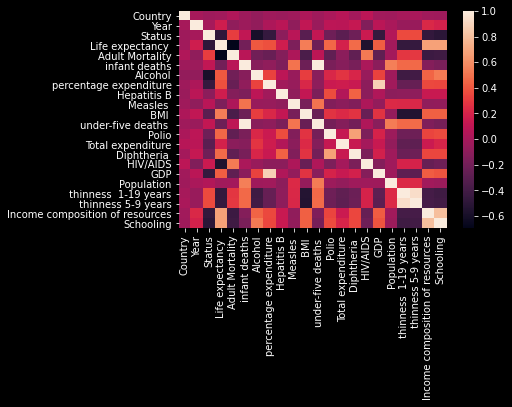

In [41]:
# plot the heatmap
corr = df_bfill.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Here it is better to establish a linear model between 'GDP' and 'percentage expenditure'. Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

# Feature Engineering

## LDA

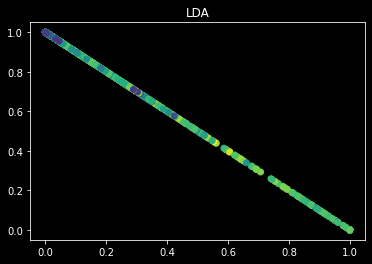

In [57]:
from sklearn.decomposition import PCA,LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=2)
X_feature_reduced = lda.fit(df_bfill).transform(df_bfill)

plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=df_bfill['Life expectancy '])
plt.title('LDA')
plt.show()

## PCA

First component explain 0.9999998952139294 variance of data and second component explain 6.255791535743753e-08 variance of data


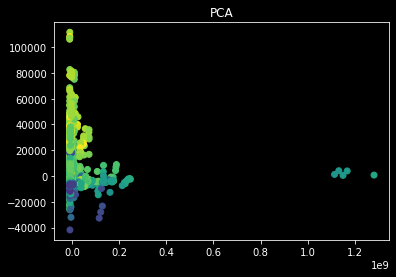

In [58]:
from sklearn.decomposition import PCA

pca = PCA (n_components=2)
X_feature_reduced = pca.fit(df_bfill).transform(df_bfill)

print ('First component explain {} variance of data and second component explain {} variance of data'.format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))

plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=df_bfill['Life expectancy '])
plt.title("PCA")
plt.show()

# Linear Regression

In [42]:
linear_reg = LinearRegression()
x = df_bfill['Life expectancy '].values.reshape(-1,1)
y = df_bfill['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

## y = b0 + b1*x is our linear regression model.
Let's see estimated percentage of expenditure in GDP 10 thousand:

In [43]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[791187.11506939]]
b1:  [[79.59596189]]


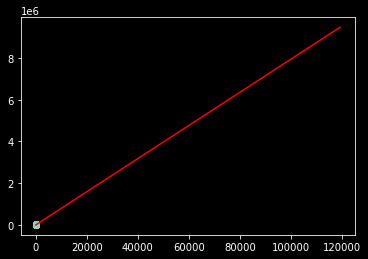

Mean Absolute Error:  4678541.668812105
Mean Squared Error:  29199576958837.32
Root Mean Squared Error:  5403663.290661005


In [44]:
x_array = np.arange(min(df_bfill.GDP),max(df_bfill.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))



In [45]:
print(r2_score(y, linear_reg.predict(x)))

0.1451860934340058


# Muti linear Regression

In [46]:


multidata = df_bfill.copy()

multidata.drop(["Country", "Status"], axis=1, inplace=True)             # When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.

x = multidata.iloc[:, [-2,-1]].values                                   # I took the last two columns (Income composition of resources, schooling) as independent variables.
y = multidata["percentage expenditure"].values.reshape(-1,1)            # our independent variable


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [48]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  [-1734.2265734]
b1,b2:  [[1957.20097909   97.97939874]]


We look at what the data set we created here will affect how much it will affect our survival.

In [49]:
new_data = [[0.4,8], [0.5,10]]   
new_data = pd.DataFrame(new_data).T       # .T is transfor the chart.
model.predict(new_data) 

array([[ -902.35648239],
       [14903.17524673]])

### Now let's look at the correctness of the evaluation we made. If the difference between the train error and the test error is not much, modeling is good.

In [50]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

1820.26102861417

In [51]:
model.score(x_train, y_train)

0.13060268443981804

In [52]:
### CV $r^2$ value of the model:

### CV $r^2$ value of the model:

In [53]:
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.12460416492540594

In [54]:
y_head = model.predict(x_test)
y_head[0:5]

array([[ 627.51839497],
       [1160.17543575],
       [1089.68039557],
       [1291.37951122],
       [ -34.37358533]])

In [55]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.14849446283139967


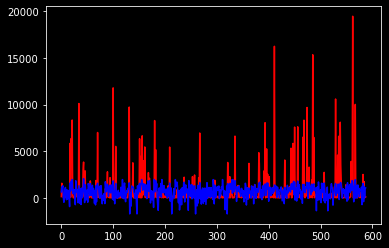

In [59]:
# r2 value: 
r2_degeri = r2_score(y_test, y_head)
print("Test r2 error = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

In [72]:
X = df_bfill.drop(['Life expectancy '],axis=1).values
y = df_bfill['Life expectancy '].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
from sklearn.tree import DecisionTreeRegressor 
cif = DecisionTreeRegressor()

In [76]:
cif.fit(X_train,y_train)

DecisionTreeRegressor()

In [77]:
cif.score(X_test, y_test)

0.9171099646349795

In [78]:
y_pred = cif.predict(X_test)

In [79]:
alg= [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR()]
    
    
for i in alg:
    model= i
    model.fit(X_train, y_train)
    
    y_pred1= model.predict(X_test)
    y_pred2= model.predict(X_train)
    print(i, "Train Root Mean Squared error:", np.sqrt(mse(y_train, y_pred2)))
    print(i, "Train Accuracy:", (1-mape(y_train, y_pred2))*100)
    print("*"*50)
    print(i, "Test Root Mean Squared error:", np.sqrt(mse(y_test, y_pred1)))
    print(i, "Test Accuracy:", (1-mape(y_test, y_pred1))*100)
    print("="*70)

RandomForestRegressor() Train Root Mean Squared error: 0.7009765488814258
RandomForestRegressor() Train Accuracy: 99.34945927776761
**************************************************
RandomForestRegressor() Test Root Mean Squared error: 1.7948978226844974
RandomForestRegressor() Test Accuracy: 98.33770830724647
AdaBoostRegressor() Train Root Mean Squared error: 2.8250040426596286
AdaBoostRegressor() Train Accuracy: 96.62417239069639
**************************************************
AdaBoostRegressor() Test Root Mean Squared error: 2.8606048135529893
AdaBoostRegressor() Test Accuracy: 96.62119844807306
GradientBoostingRegressor() Train Root Mean Squared error: 1.7535076020671063
GradientBoostingRegressor() Train Accuracy: 98.1590737174083
**************************************************
GradientBoostingRegressor() Test Root Mean Squared error: 2.1276271020705013
GradientBoostingRegressor() Test Accuracy: 97.7507305807169
DecisionTreeRegressor() Train Root Mean Squared error: 0.0
Deci

In [80]:
new = pd.DataFrame(columns = ['Country', 'Year', 'Status','Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'])

# for i in range(1):
#     for i in range(len(values)):
#         print(values[i]) 
#     BuildingType = int(input("Enter the building type "))
#     print("------------------------------")
#     for i in range(len(values1)):
#         print(values1[i])
#     Location = int(input("Enter the location "))
#     print("------------------------------")
#     for i in range(len(values2)):
#         print(values2[i])
#     Size = int(input("Enter the Size of house: ") or 0)
#     print("------------------------------")
#     AreaSqFt = int(input("Enter the sqft area: ") or 0)
#     print("------------------------------")
#     NoOfBath = int(input("Enter the NoOfBath: ")or 0)
#     print("------------------------------")
#     NoOfPeople = int(input("Enter the NoOfPeople: ") or 0)
#     print("------------------------------")
#     NoOfBalcony = int(input("Enter the NoOfBalcony:") or 0)
#     #size = 0
#     data_1 = {"BuildingType": BuildingType , "Location": Location, "Size": Size, "AreaSqFt":AreaSqFt ,"NoOfBath" :NoOfBath ,"NoOfPeople":NoOfPeople, "NoOfBalcony":NoOfBalcony}
#     df = df.append(data_1, ignore_index=True)
# df


In [81]:
for i in range(1):
#     for i in range(0,len(new)):
    a = float(input())
    data_1 = {'Country' : 192 , 'Year': 2004, 'Status':1,'Adult Mortality':723.0,
       'Alcohol': a, 'percentage expenditure':0, 'Measles ':31, ' BMI ':27.1, 'Polio':67.0,
       'Total expenditure':7.13, 'Diphtheria ':65., ' HIV/AIDS':33.6, 'GDP':454.366654, 'Population':12777511.0,
       ' thinness  1-19 years':9.4, 'Income composition of resources':0.407,
       'Schooling':9.2}
        
new = new.append(data_1, ignore_index=True)
new

50


,Country,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,192.0,2004.0,1.0,723.0,50.0,0.0,31.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2


In [82]:
alg= [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR()]
    
    
for i in alg:
    model= i
    model.fit(X_train, y_train)
    
    y_pred1= model.predict(X_test)
    print(y_pred1)
    y_pred2= model.predict(X_train)
    print(i, "Train Root Mean Squared error:", np.sqrt(mse(y_train, y_pred2)))
    print(i, "Train Accuracy:", (1-mape(y_train, y_pred2))*100)
    print("*"*50)
    print()
    print(i, "Test Root Mean Squared error:", np.sqrt(mse(y_test, y_pred1)))
    print(i, "Test Accuracy:", (1-mape(y_test, y_pred1))*100)
    print("="*70)

[49.772 67.96  72.237 74.96  73.074 66.693 63.102 73.094 71.742 73.193
 79.742 60.572 73.231 61.621 73.924 72.806 76.735 76.829 74.338 70.845
 73.922 58.039 73.822 56.499 72.021 60.969 75.076 72.595 83.03  57.276
 65.07  56.687 68.582 70.876 61.549 73.847 73.288 73.515 81.769 76.875
 82.878 76.718 83.257 71.907 72.43  57.118 60.076 49.937 66.903 73.266
 54.909 74.686 61.746 75.304 72.601 52.573 55.856 83.955 65.168 74.088
 66.739 66.545 82.129 66.534 74.2   60.919 62.34  44.694 62.624 73.856
 76.365 82.28  72.332 73.431 76.507 81.23  72.053 59.04  53.161 54.362
 57.389 71.606 73.238 78.416 79.262 72.668 54.005 74.568 52.093 79.081
 73.949 78.021 56.357 79.054 52.692 66.822 64.273 72.202 62.538 72.843
 76.621 51.242 71.903 75.499 72.406 69.792 66.68  62.577 75.268 69.009
 77.656 80.497 63.646 71.704 75.166 69.938 76.752 69.38  62.996 76.335
 54.259 67.977 73.394 75.387 76.188 81.818 67.693 47.262 54.784 73.938
 73.907 72.456 76.14  62.486 62.268 71.804 67.14  56.32  46.42  48.111
 56.22

In [83]:
df = pd.read_csv("C:/Users/Prathima/Downloads/Life Expectancy Data_HV22_1.csv")
df


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [84]:
df.shape

(2938, 22)

In [85]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV/AIDS                             0
GDP                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [87]:
label_encoder = preprocessing.LabelEncoder()
df['country']= label_encoder.fit_transform(df['country']) 
df['status']= label_encoder.fit_transform(df['status'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   int32  
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   int32  
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [89]:
df.drop(['infant_deaths', 'hepatitis_b', 'under-five_deaths', 'thinness_5-9_years'], axis=1, inplace = True)

In [90]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'alcohol', 'percentage_expenditure', 'measles', 'bmi', 'polio',
       'total_expenditure', 'diphtheria', 'HIV/AIDS', 'GDP', 'population',
       'thinness_10-19_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [91]:
df_bfill = df.fillna(method='bfill')

In [92]:
df_bfill.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
alcohol                            0
percentage_expenditure             0
measles                            0
bmi                                0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV/AIDS                           0
GDP                                0
population                         0
thinness_10-19_years               0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [93]:
X = df_bfill.drop(['life_expectancy'],axis=1).values
y = df_bfill['life_expectancy'].values

In [94]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [96]:
n_estimators = [20,60,100,120]

max_features = [0.2,0.6,1.0]

max_depth = [2,3,4,5,6]

max_samples = [0.5,0.75,1.0]


In [97]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples
              }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 3, 4, 5, 6], 'max_samples': [0.5, 0.75, 1.0]}


In [98]:
rf = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1)

In [99]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [100]:
rf_grid.best_params_

{'max_depth': 6, 'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 120}

In [101]:
rf_grid.best_score_

0.9401585511533856

In [102]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(max_depth = 6,
 max_features =  1.0,
 max_samples =  1.0,
 n_estimators = 120)

In [103]:
regressor_rf.fit(X_train,y_train)
y_pred = regressor_rf.predict(X_test)

In [104]:
regressor_rf.score(X_test, y_test)

0.9447243192176121

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, regressor_rf.predict(X_train)))
rmse

1.913806834271415

In [106]:
from sklearn.tree import DecisionTreeRegressor 
cif = DecisionTreeRegressor()
cif.fit(X_train,y_train)
print(cif.score(X_test, y_test))
y_pred = cif.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_train,cif.predict(X_train)))
rmse

0.9286956338754473


2.538732250238583e-16

In [107]:
import pickle
model = 'life_expetency.pkl'
pickle.dump(regressor_rf, open(model, 'wb'))
loaded_model = pickle.load(open(model, 'rb'))